ForneyLab.jl basics tutorial
============================
This is the first tutorial in a series of practical demos that showcase ForneyLab in action. In this demo we show how to build a basic factor graph and how to calculate a sum-product message. For clarification on the basic types and functionality of the ForneyLab.jl toolbox please consult the [ForneyLab documentation](http://spsbrats.github.io/ForneyLab/documentation). We assume the reader has basic knowledge of message passing algorithms and factor graphs. 

If you are following this tutorial online you do not need to install Julia. However, for working with the ForneyLab.jl toolbox on your own machine and executing the demo code you need to install Julia (v.0.3). Installation instructions can be found on the Julia webpage and the `README.md` file.

Graph contruction example
-------------------------
---
Before starting any project, we need to include the ForneyLab toolbox.

In [1]:
using ForneyLab

We want to create a simple factor graph where an incoming message is multiplied with a constant factor `A`.

```
node1  node2    node3
 [N]--->[A]----->[T]
            out
```

First we initialize the Gaussian source node on the left by constructing a `PriorNode` and setting its value to a Gaussian probability distribution. We set the distribution mean and variance to 1. We also assign an (optional) name. After construction we inspect the node and its value. We see that the node's value is exactly what we set it to be.

In [2]:
node1 = PriorNode(GaussianDistribution(m=1.0, V=1.0), name="prior_node")
show(node1)
show(node1.value)

TerminalNode with name prior_node
N(m=[1.00], V=[[1.00]])


Next, we initialize the multiplication by `A` by constructing a `FixedGain` node. Here, we set the multiplication factor to 2. We inspect the node and its multiplication factor and see everything is in order.

In [3]:
node2 = FixedGainNode(2.0, name="factor_multiplication_node")
show(node2)
show(node2.A)

FixedGainNode with name factor_multiplication_node
[2.0]

Lastly, we create the `TerminalNode` that completes out model.

In [4]:
node3 = TerminalNode(name="end_node")

TerminalNode with name end_node


The next step is to connect the nodes with edges.

In [5]:
Edge(node1, node2.i[:in])
Edge(node2.i[:out], node3);

That's it, the graph is ready. We can inspect our work by invoking `draw()`:


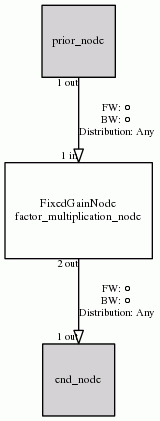

In [6]:
draw() # Visualizes the current graph

Message calculation example
---------------------------
---
Now suppose we want to calculate the sum-product message from the multiplication node towards the terminal node. We can do this by  defining a sum-product algorithm that implements a message passing schedule towards the `out` interface of the multiplication node. 

In [7]:
algo = SumProduct.Algorithm(node2.i[:out])
show(algo.fields[:schedule])

Message passing schedule (entry: node [interface], rule)
------------------------------------------------------
1: TerminalNode prior_node [1:out], sumProduct! 
2: FixedGainNode factor_multiplication_node [2:out], sumProduct! 


Now we can run the algorithm in order to calculate our message of interest.

In [8]:
run(algo)

Message{GaussianDistribution} with payload N(m=[2.00], V=[[4.00]])

